# 生存時間解析
生存時間分析のためのノンパラメトリックな手法の1つで、比例ハザードモデル。

生存時間データのほかに年齢や性別などの共変量を用いることで、共変量が生存時間に与える影響を調べることができる。

カテゴリー間におけるハザード比は共変量にのみ依存しており、時間には依存しない。これを比例ハザード性といい、Cox比例ハザードモデルではこの比例ハザード性が成立することを仮定

# ライブラリのインポート

In [1]:
from lifelines import CoxPHFitter
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み

In [2]:
df = pd.read_csv("rossi.csv",encoding="shift-jis")
df.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


# Cox比例ハザードモデルの宣言とモデル化

In [3]:
model = CoxPHFitter()
model.fit(df,duration_col="week",event_col="arrest")

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>

# モデルの出力
ここでは係数だけでなく最尤推定やp値他も出力される。

In [4]:
model.print_summary()

<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -658.75
  time fit was run = 2022-10-19 03:52:01 UTC

---
      coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper 0.95
fin  -0.38      0.68      0.19 -1.98   0.05      4.40       -0.75       -0.00
age  -0.06      0.94      0.02 -2.61   0.01      6.79       -0.10       -0.01
race  0.31      1.37      0.31  1.02   0.31      1.70       -0.29        0.92
wexp -0.15      0.86      0.21 -0.71   0.48      1.06       -0.57        0.27
mar  -0.43      0.65      0.38 -1.14   0.26      1.97       -1.18        0.31
paro -0.08      0.92      0.20 -0.43   0.66      0.59       -0.47        0.30
prio  0.09      1.10      0.03  3.19 <0.005      9.48        0.04        0.15
---
Concordance = 0.64
Log-likelihood ratio test = 33.27 on 7 df, -log2(p)=15.37


# 生存モデルの可視化

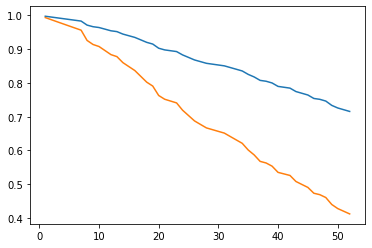

In [5]:
pred = model.predict_survival_function(df)
plt.plot(pred.index, pred[0].values)#1人目のデータ
plt.plot(pred.index, pred[1].values)#2人目のデータ
plt.show()

# 項目ごとの係数の95%の信頼区間を可視化

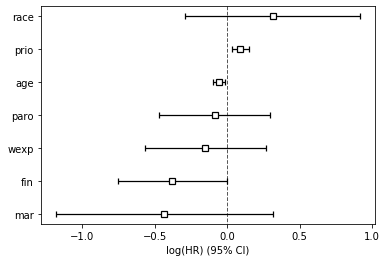

In [6]:
model.plot()
plt.show()